In [44]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.integrate import solve_ivp
import pandas as pd

# Loading the CSV files 
hourly_monitoring_file_path = 'hourlyMonitoring.csv'
site_location_file_path = "location.csv"

hourly_monitoring_df = pd.read_csv(hourly_monitoring_file_path)
location_df = pd.read_csv(site_location_file_path)

june2023hourly_monitoring_file_path = "june2023hourlyMonitoring.csv"
june2023hourly_monitoring_df = pd.read_csv(june2023hourly_monitoring_file_path)

In [13]:
# loading heads of files 
hourly_monitoring_df_head = hourly_monitoring_df.head()
location_df_head = location_df.head()

location_df_head, hourly_monitoring_df_head

(         SiteID   Latitude  Longitude          SiteName  \
 0  36061NY08454  40.716510 -73.997004  Manhattan Bridge   
 1  36005NY11790  40.819092 -73.885659       Hunts Point   
 2  36081NY08198  40.707113 -73.873400          Glendale   
 3  36081NY09285  40.737107 -73.821556    Queens College   
 4  36061NY09734  40.750690 -73.987830  Broadway/35th St   
 
                                              Address  
 0                      Canal St SS1E of Elizabeth St  
 1  Southeast Corner of Seneca Ave and Longfellow Ave  
 2   Cooper Rapid Rehousing Center - 78-16 Cooper Ave  
 3                      Queens College Reference Site  
 4                           Broadway ES1N of 35th St  ,
        ID        SiteID       ObservationTimeUTC  Value
 0  402389  36081NY09285  2023-05-01 00:00:00.000   5.91
 1  404902  36061NY10130  2023-05-01 00:00:00.000  11.11
 2  407436  36061NY08552  2023-05-01 00:00:00.000  12.93
 3  410211  36005NY12387  2023-05-01 00:00:00.000  12.19
 4  412737  3606

In [29]:
june2023hourly_monitoring_df_head = june2023hourly_monitoring_df.head()
location_df_head = location_df.head()

location_df_head, june2023hourly_monitoring_df_head

(         SiteID   Latitude  Longitude          SiteName  \
 0  36061NY08454  40.716510 -73.997004  Manhattan Bridge   
 1  36005NY11790  40.819092 -73.885659       Hunts Point   
 2  36081NY08198  40.707113 -73.873400          Glendale   
 3  36081NY09285  40.737107 -73.821556    Queens College   
 4  36061NY09734  40.750690 -73.987830  Broadway/35th St   
 
                                              Address  
 0                      Canal St SS1E of Elizabeth St  
 1  Southeast Corner of Seneca Ave and Longfellow Ave  
 2   Cooper Rapid Rehousing Center - 78-16 Cooper Ave  
 3                      Queens College Reference Site  
 4                           Broadway ES1N of 35th St  ,
        ID        SiteID       ObservationTimeUTC  Value
 0  403110  36081NY09285  2023-06-01 00:00:00.000  19.70
 1  405678  36061NY10130  2023-06-01 00:00:00.000  19.00
 2  408168  36061NY08552  2023-06-01 00:00:00.000  20.65
 3  411039  36005NY12387  2023-06-01 00:00:00.000  22.43
 4  413474  3606

In [32]:
# merging the df to match site locations of hourly monitoring

merged_df = pd.merge(hourly_monitoring_df, location_df, on='SiteID', how='inner')
merged_df_head = merged_df.head()

merged_df_head

june2023merged_df = pd.merge(june2023hourly_monitoring_df, location_df, on='SiteID', how='inner')
june2023merged_df_head = june2023merged_df.head()

In [33]:
# averaging the hourly PM2.5 value for each location 

#may 2023 
# Ensuring the 'ObservationTimeUTC' column is in datetime format
merged_df['ObservationTimeUTC'] = pd.to_datetime(merged_df['ObservationTimeUTC'], errors='coerce')

# Recalculating the hourly average PM2.5 values for each location
hourly_avg_pm25 = merged_df.groupby(['SiteName', merged_df['ObservationTimeUTC'].dt.hour])['Value'].mean().reset_index()

# Renaming columns for clarity
hourly_avg_pm25.rename(columns={'Value': 'Hourly Average PM2.5', 'ObservationTimeUTC': 'Hour'}, inplace=True)

hourly_avg_pm25

#june 2023
# Ensuring the 'ObservationTimeUTC' column is in datetime format
june2023merged_df['ObservationTimeUTC'] = pd.to_datetime(june2023merged_df['ObservationTimeUTC'], errors='coerce')

# Recalculating the hourly average PM2.5 values for each location
june2023hourly_avg_pm25 = june2023merged_df.groupby(['SiteName', merged_df['ObservationTimeUTC'].dt.hour])['Value'].mean().reset_index()

# Renaming columns for clarity
june2023hourly_avg_pm25.rename(columns={'Value': 'Hourly Average PM2.5', 'ObservationTimeUTC': 'Hour'}, inplace=True)

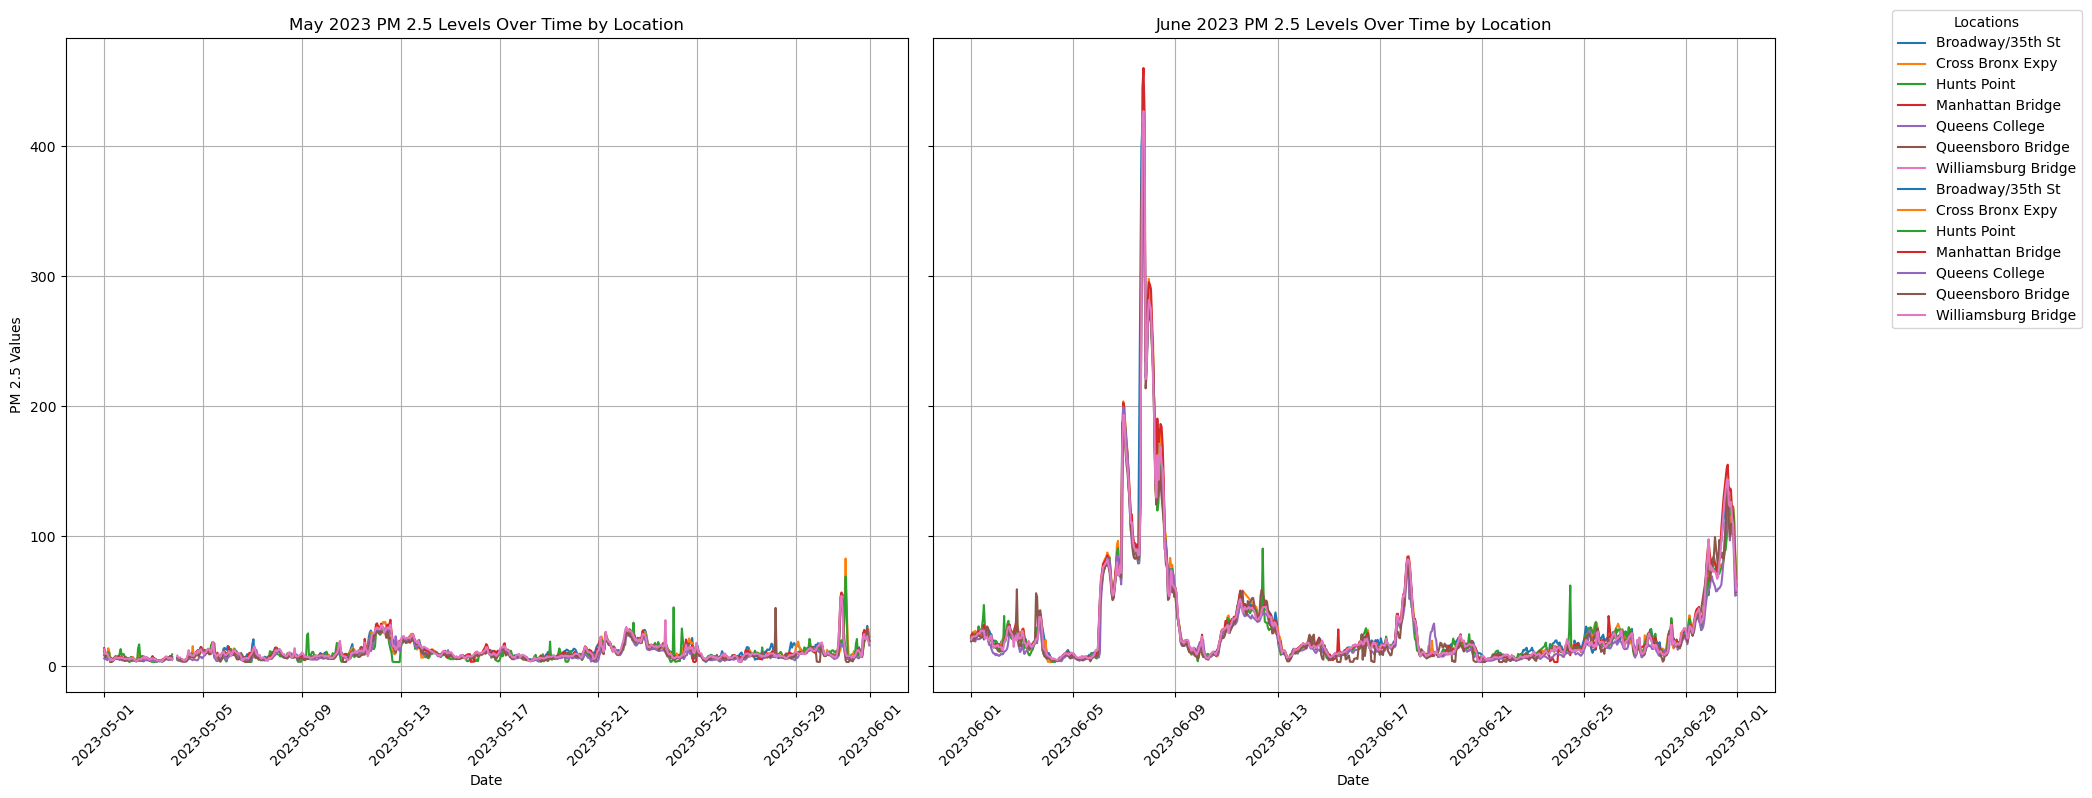

In [42]:
# Create a figure and subplots
fig, axes = plt.subplots(1, 2, figsize=(18, 8), sharey=True)  # Two subplots side by side

# May 2023 Plot
grouped_data = merged_df.groupby('SiteName')
for site, data in grouped_data:
    axes[0].plot(data['ObservationTimeUTC'], data['Value'], label=site)

axes[0].set_xlabel('Date')
axes[0].set_ylabel('PM 2.5 Values')
axes[0].set_title('May 2023 PM 2.5 Levels Over Time by Location')
axes[0].grid()
axes[0].tick_params(axis='x', rotation=45)

# June 2023 Plot
june2023grouped_data = june2023merged_df.groupby('SiteName')
for site, data in june2023grouped_data:
    axes[1].plot(data['ObservationTimeUTC'], data['Value'], label=site)

axes[1].set_xlabel('Date')
axes[1].set_title('June 2023 PM 2.5 Levels Over Time by Location')
axes[1].grid()
axes[1].tick_params(axis='x', rotation=45)

# Shared legend outside the plots
fig.legend(loc='upper left', bbox_to_anchor=(1.05, 1), title="Locations")
plt.tight_layout()

# Show the combined plot
plt.show()


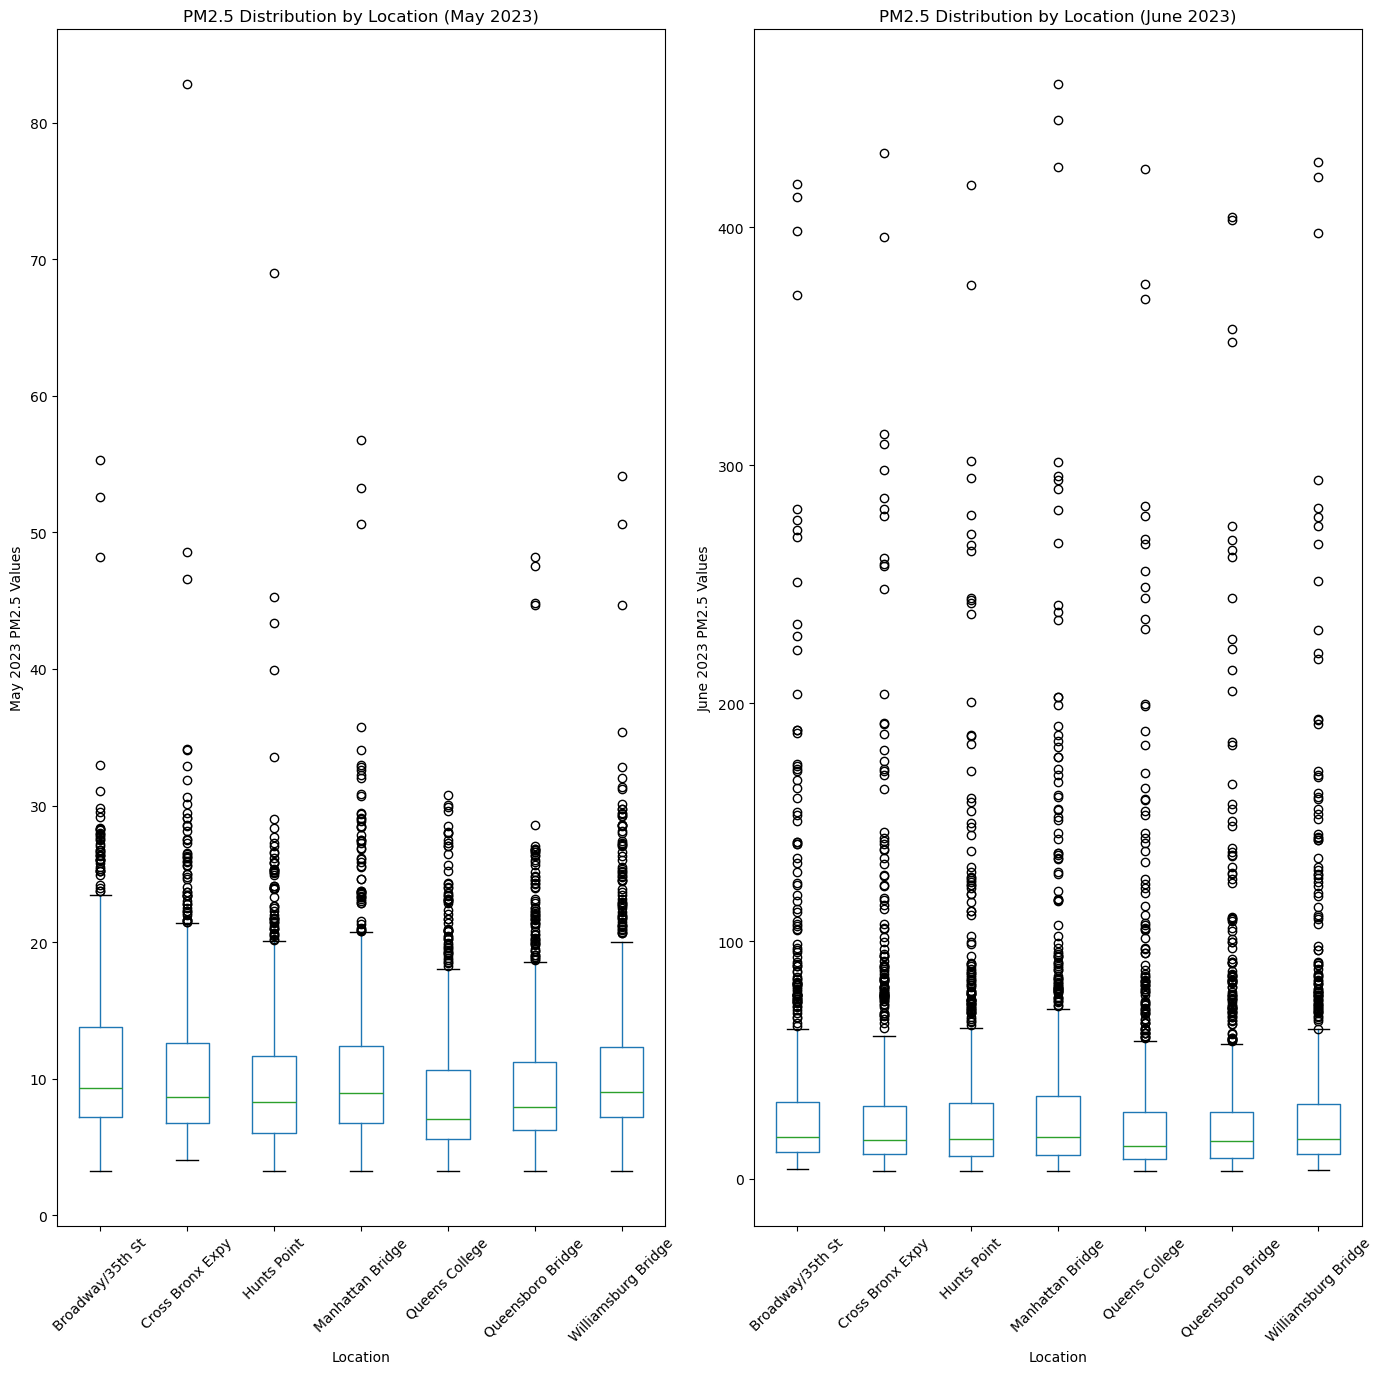

In [43]:
# Create a figure with two subplots
fig, ax = plt.subplots(ncols=2, nrows=1, figsize=(14, 14))

# First boxplot: May 2023 PM2.5 Values by Location
merged_df.boxplot(column='Value', by='SiteName', ax=ax[0], grid=False)
ax[0].set_title('PM2.5 Distribution by Location (May 2023)')
ax[0].set_xlabel('Location')
ax[0].set_ylabel('May 2023 PM2.5 Values')
plt.suptitle('')  # Remove default subtitle
ax[0].tick_params(axis='x', rotation=45)

# Second boxplot: June 2023 PM2.5 Values by Location
june2023merged_df.boxplot(column='Value', by='SiteName', ax=ax[1], grid=False)
ax[1].set_title('PM2.5 Distribution by Location (June 2023)')
ax[1].set_xlabel('Location')
ax[1].set_ylabel('June 2023 PM2.5 Values')
plt.suptitle('')  # Remove default subtitle
ax[1].tick_params(axis='x', rotation=45)

# Adjust layout and show the plot
plt.tight_layout()
plt.show()

In [48]:
# Precipitation Data

yearly_precipitation_file_path = 'monthlyannualprecip.csv'
yearly_precipitation_df = pd.read_csv(yearly_precipitation_file_path)
yearly_precipitation_df_head = yearly_precipitation_df.head()
yearly_precipitation_df_head

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Monthly & Annual Precipitation at Central Park,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13
0,NaN,NaN,NaN,NaN,NaN,Last Updated: 12/1/2024,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL
2,1869,2.53,6.87,4.61,1.39,4.15,4.4,3.2,1.76,2.81,6.48,2.03,5.02,45.25
3,1870,4.41,2.83,3.33,5.11,1.83,2.82,3.76,3.07,2.52,4.97,2.42,2.18,39.25
4,1871,2.07,2.72,5.54,3.03,4.04,7.05,5.57,5.6,2.34,7.5,3.56,2.24,51.26


In [54]:
#cleaning up data

yearly_precipitation_data_cleaned = pd.read_csv(yearly_precipitation_file_path, skiprows=2)
yearly_precipitation_data_cleaned.columns = [
    'Year', 'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
    'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec', 'Annual'
]

yearly_precipitation_data_cleaned['Year'] = pd.to_numeric(yearly_precipitation_data_cleaned['Year'], errors='coerce')
yearly_precipitation_data_cleaned = yearly_precipitation_data_cleaned.dropna(subset=['Year'])
yearly_precipitation_data_cleaned['Year'] = yearly_precipitation_data_cleaned['Year'].astype(int)
precip_columns = ['May', 'Jun']
yearly_precipitation_data_cleaned[precip_columns] = yearly_precipitation_data_cleaned[precip_columns].apply(pd.to_numeric, errors='coerce')
data_filtered = yearly_precipitation_data_cleaned[(yearly_precipitation_data_cleaned['Year'] >= 2013) & (yearly_precipitation_data_cleaned['Year'] <= 2023)]

data_filtered

,Year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,Annual
147,2013,2.76,4.25,2.9,1.31,8.00,10.10,2.84,2.85,2.95,0.36,3.15,4.85,46.32
148,2014,2.79,5.48,3.67,7.85,4.37,4.26,5.59,2.25,1.21,5.77,4.51,6.04,53.79
149,2015,5.23,2.04,4.72,2.08,1.86,4.79,3.98,2.35,3.28,3.91,2.01,4.72,40.97
150,2016,4.41,4.4,1.17,1.61,3.75,2.60,7.02,1.97,2.79,4.15,5.41,2.89,42.17
151,2017,4.83,2.48,5.25,3.84,6.38,4.76,4.19,3.34,2,4.18,1.58,2.21,45.04
152,2018,2.18,5.83,5.17,5.78,3.53,3.11,7.45,8.59,6.19,3.59,7.62,6.51,65.55
153,2019,3.58,3.14,3.87,4.55,6.82,5.46,5.77,3.7,0.95,6.15,1.95,7.09,53.03
154,2020,1.93,2.54,3.78,4.49,1.65,1.76,6.58,5.03,3.94,5.05,3.99,4.61,45.35
155,2021,2.31,5.13,3.41,2.69,4.36,2.62,11.09,10.32,10.03,5.26,1.12,1.39,59.73
156,2022,4.29,3.23,2.39,4.53,4.52,2.92,4.55,1.71,4.1,5.08,3.15,5.83,46.3


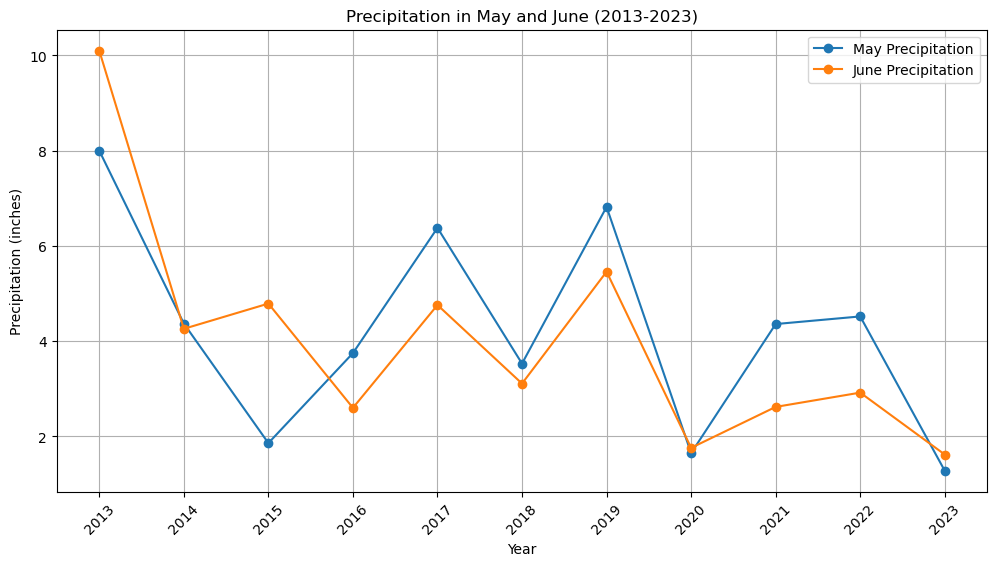

In [55]:
#creating a plot of precipitation avergaes from 2013-2013 for the months of May and June
# Create a plot with all years explicitly shown on the x-axis
plt.figure(figsize=(12, 6))

# Plot precipitation for May
plt.plot(data_filtered['Year'], data_filtered['May'], label='May Precipitation', marker='o')

# Plot precipitation for June
plt.plot(data_filtered['Year'], data_filtered['Jun'], label='June Precipitation', marker='o')

# Add labels, title, and legend
plt.xlabel('Year')
plt.ylabel('Precipitation (inches)')
plt.title('Precipitation in May and June (2013-2023)')
plt.legend()
plt.grid()

# Explicitly set x-ticks to show all years
plt.xticks(data_filtered['Year'], rotation=45)

# Show the plot
plt.show()

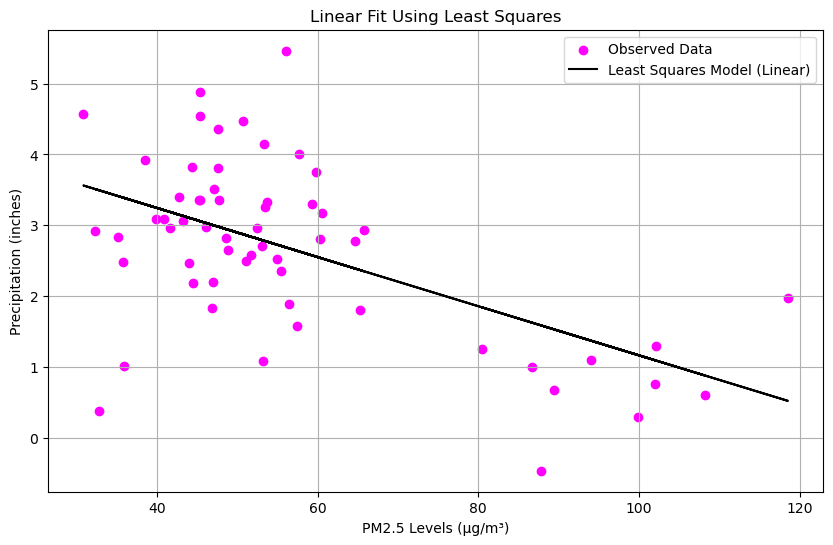

In [58]:
# Fixing the code to create a single plot instead of subplots
np.random.seed(42)
dates = np.arange(1, 61)  # 60 days for May and June
pm25 = np.random.normal(loc=50, scale=10, size=len(dates))
pm25[30:40] += 50  # Simulated spike due to wildfire
precipitation = np.random.normal(loc=3, scale=1, size=len(dates))
precipitation[30:40] -= 2  # Simulated decrease due to wildfire

# Part 1: Least Squares Linear Fit
N = len(dates)
M = 2
G = np.zeros((N, M))
G[:, 0] = np.ones(N)  # Constant term
G[:, 1] = pm25        # Linear term

GTG = np.matmul(G.T, G)
GTd = np.matmul(G.T, precipitation)
mest = np.linalg.solve(GTG, GTd)

dpre = np.matmul(G, mest)

# Create a single plot
plt.figure(figsize=(10, 6))
plt.scatter(pm25, precipitation, color='magenta', label='Observed Data')
plt.plot(pm25, dpre, 'k-', label='Least Squares Model (Linear)')
plt.xlabel('PM2.5 Levels (µg/m³)')
plt.ylabel('Precipitation (inches)')
plt.legend()
plt.title('Linear Fit Using Least Squares')
plt.grid()
plt.show()


In [59]:
#The graph shows a negative correlation between PM2.5 levels and precipitation,indicating that higher pollution from wildfires likely reduced rainfall in May and June 2023. This supports the hypothesis that wildfire emissions disrupted normal weather patterns, suppressing precipitation.